### Step 1: Loading the dataset

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from pickle import dump
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [76]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'
data_reviews = pd.read_csv(url, sep=',')
data_reviews.to_csv('/workspaces/JLL_Naive_Bayes_ML/data/raw/playstore_reviews.csv', index = False)

### Step 2: Study of variables and their content

In [77]:
data_reviews = pd.read_csv('/workspaces/JLL_Naive_Bayes_ML/data/raw/playstore_reviews.csv', sep=',')
data_reviews.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


***Delete non-relevant information***

In [78]:
data_reviews.drop('package_name', axis=1, inplace=True)


***Removing spaces and converting the text to lowercase***

In [79]:
data_reviews["review"] = data_reviews["review"].str.strip().str.lower()
data_reviews.head()

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


***Divide the dataset into train and test:***

In [80]:
X = data_reviews['review']
y = data_reviews['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Transform the text into a word count matrix***

In [81]:
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

### Step 3: Build a naive bayes model

*I select the MultinomialNB, because the data  with classification with features representing discrete counts or frequencies*

In [82]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [83]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [84]:
accuracy_score(y_test, y_pred)

0.8156424581005587

*I will test the other sklearn Naive Bayes models:*

In [85]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

for model_aux in [GaussianNB(), BernoulliNB()]:
    model_aux.fit(X_train, y_train)
    y_pred_aux = model_aux.predict(X_test)
    print(f"{model_aux} with accuracy: {accuracy_score(y_test, y_pred_aux)}")

GaussianNB() with accuracy: 0.8044692737430168
BernoulliNB() with accuracy: 0.770949720670391


***I can confirm that the best model is the one I have chosen based on its theoretical foundation***

### Optimize the model

In [86]:
hyperparams = {
    "alpha": np.linspace(0.01, 100.0),
    "force_alpha": [True,False]
}

random_search = RandomizedSearchCV(model, hyperparams, n_iter = 50, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=50,
                   param_distributions={'alpha': array([1.00000000e-02, 2.05061224e+00, 4.09122449e+00, 6.13183673e+00,
       8.17244898e+00, 1.02130612e+01, 1.22536735e+01, 1.42942857e+01,
       1.63348980e+01, 1.83755102e+01, 2.04161224e+01, 2.24567347e+01,
       2.44973469e+01, 2.65379592e+01, 2.85785714e+01, 3.06191837e+01,
       3.26597959e+01...
       5.71471429e+01, 5.91877551e+01, 6.12283673e+01, 6.32689796e+01,
       6.53095918e+01, 6.73502041e+01, 6.93908163e+01, 7.14314286e+01,
       7.34720408e+01, 7.55126531e+01, 7.75532653e+01, 7.95938776e+01,
       8.16344898e+01, 8.36751020e+01, 8.57157143e+01, 8.77563265e+01,
       8.97969388e+01, 9.18375510e+01, 9.38781633e+01, 9.59187755e+01,
       9.79593878e+01, 1.00000000e+02]),
                                        'force_alpha': [True, False]},
                   random_state=42, scoring='accuracy')

In [87]:
random_search.fit(X_train, y_train)
random_search.best_estimator_

MultinomialNB(alpha=0.01, force_alpha=True)

In [88]:
model_2 = MultinomialNB(**random_search.best_params_)

model_2.fit(X_train, y_train)
y_pred_2 = model.predict(X_test)
print(model_2.get_params())
print("Accuracy:", accuracy_score(y_test, y_pred_2))


{'alpha': 0.01, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}
Accuracy: 0.8156424581005587


***We improve the model score***

### Save the model

In [89]:
dump(model, open("/workspaces/JLL_Naive_Bayes_ML/models/naive_bayes_optimized.sav", "wb"))

### Exploratory other options

***Decision Tree***

In [90]:
model_3 = DecisionTreeClassifier(random_state = 42)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
y_pred_train = model_3.predict(X_train)
print('Accuracy train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy test: ', accuracy_score(y_pred_3, y_test))

Accuracy train:  1.0
Accuracy test:  0.7150837988826816


***Logistic regression***

In [91]:
model_4 = LogisticRegression()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)
y_pred_train = model_4.predict(X_train)
print('Accuracy train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy test: ', accuracy_score(y_pred_4, y_test))

Accuracy train:  0.9985955056179775
Accuracy test:  0.8324022346368715


***Random Forest***

In [92]:
model_5 = RandomForestClassifier(random_state = 42)
model_5.fit(X_train, y_train)
y_pred_5 = model_5.predict(X_test)
y_pred_train = model_5.predict(X_train)
print('Accuracy train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy test: ', accuracy_score(y_pred_5, y_test))

Accuracy train:  1.0
Accuracy test:  0.7988826815642458


***Boosting***

In [93]:
model_6 = XGBClassifier(random_state = 42)
model_6.fit(X_train, y_train)
y_pred_6 = model_6.predict(X_test)
y_pred_train = model_6.predict(X_train)
print('Accuracy train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy test: ', accuracy_score(y_pred_6, y_test))

Accuracy train:  0.9676966292134831
Accuracy test:  0.8156424581005587


Naive_Bayes Multinomian=0.754
Naive_Bayes Multinomian Optimized=0.754
Decision Tree=0.683
Logistic Regression=0.826
Random Forest=0.781
Boosting=0.782


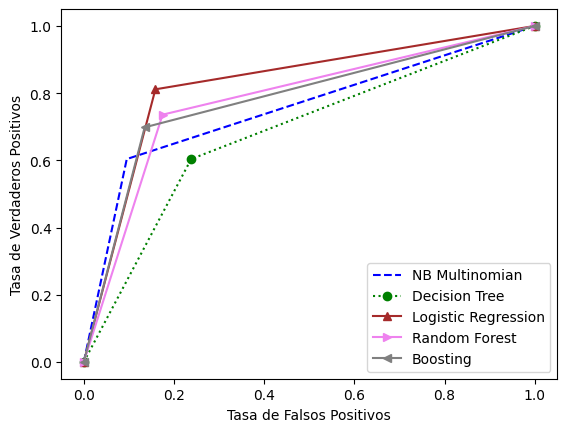

In [103]:
# Calculamos el AUC
NB_Multinomian_auc = roc_auc_score(y_test, y_pred)
NB_Multinomian_optimized_auc = roc_auc_score(y_test, y_pred_2)
Decision_Tree_auc = roc_auc_score(y_test, y_pred_3)
Logistic_Regression_auc = roc_auc_score(y_test, y_pred_4)
Random_Forest_auc = roc_auc_score(y_test, y_pred_5)
Boosting_auc = roc_auc_score(y_test, y_pred_6)

# Imprimimos en pantalla
print('Naive_Bayes Multinomian=%.3f' % (NB_Multinomian_auc))
print('Naive_Bayes Multinomian Optimized=%.3f' % (NB_Multinomian_optimized_auc))
print('Decision Tree=%.3f' % (Decision_Tree_auc))
print('Logistic Regression=%.3f' % (Logistic_Regression_auc))
print('Random Forest=%.3f' % (Random_Forest_auc))
print('Boosting=%.3f' % (Boosting_auc))

# Calculamos las curvas ROC
NBM_fpr, NBM_tpr, _ = roc_curve(y_test, y_pred)
NBMO_fpr, NBMO_tpr, _ = roc_curve(y_test, y_pred_2)
DT_fpr, DT_tpr, _ = roc_curve(y_test, y_pred_3)
LR_fpr, LR_tpr, _ = roc_curve(y_test, y_pred_4)
RF_fpr, RF_tpr, _ = roc_curve(y_test, y_pred_5)
B_fpr, B_tpr, _ = roc_curve(y_test, y_pred_6)

# Pintamos las curvas ROC
pyplot.plot(NBM_fpr, NBM_tpr, linestyle='--', color='blue', label='NB Multinomian')
pyplot.plot(DT_fpr, DT_tpr, linestyle= ':', marker='o', color= 'green', label='Decision Tree')
pyplot.plot(LR_fpr, LR_tpr, marker='^', color= 'brown', label='Logistic Regression')
pyplot.plot(RF_fpr, RF_tpr, marker='>', color= 'violet',label='Random Forest')
pyplot.plot(B_fpr, B_tpr, marker='<', color= 'grey',label='Boosting')

# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()